**Visualization of association findings**

So far, we have performed association analysis on a set of variants against Alzheimer's disease. In this notebook, we will see how the association statistics can be visualized using **Manhattan plots** and **Quantile-Quantile (QQ) plots**. While association statistics from large-scale association studies often include tens of thousands of candidate loci, for demonstration purposes, we selected a small region on chromosome 19 for visualization. 

**Import necessary libraries**

* matplotlib: For general purpose plotting
* pandas: For intuitive data manipulation
* numpy: For numerical computation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Demo data exploration**

First load the demo data from GitHub repository. Then, visualize the association statistics using pandas dataframe.

In [ ]:
!wget -c https://github.com/snakesch/PLINK_tutorial/releases/download/demo_data/sumstats.zip
!unzip sumstats.zip

In [ ]:
assoc_df = pd.read_csv("test.assoc.logistic", sep="\s+")
print(f"Loaded {assoc_df.shape[0]} variant associations.")
assoc_df

Loaded 871 variant associations.


,CHR,SNP,BP,A1,TEST,NMISS,OR,STAT,P
0,19,19_44840322_G_A,44840322,A,ADD,4386,0.9690,-0.4681,0.63970
1,19,19_44840407_A_G,44840407,G,ADD,4354,0.9696,-0.4816,0.63010
2,19,19_44840476_G_GA,44840476,G,ADD,2593,0.9678,-0.5344,0.59300
3,19,19_44840476_G_GAA,44840476,GAA,ADD,2593,0.9731,-0.3509,0.72560
4,19,19_44840476_GAAAAAAAAAA_GAAAAAAAA,44840476,GAAAAAAAA,ADD,3502,0.8456,-0.8436,0.39890
...,...,...,...,...,...,...,...,...,...
866,19,19_44999110_TAAAAAAAAAAAAA_TAAAAAAAAAA,44999110,TAAAAAAAAAA,ADD,4242,0.9186,-1.9350,0.05303
867,19,19_44999245_A_C,44999245,C,ADD,4392,0.9633,-0.4102,0.68160
868,19,19_44999550_C_T,44999550,T,ADD,4391,1.1130,2.2060,0.02739
869,19,19_44999808_C_CA,44999808,CA,ADD,4324,1.0130,0.1989,0.84230


**Visualization of association signals**

Next we define a helper function to make Manhattan plots based on the summary statistics we got from PLINK. Feel free to adjust `zoom_out` argument of `plot_manhattan()` to see how the variant signals form a stack.

In [12]:
def plot_manhattan(assoc_df: pd.DataFrame, chrom="CHR", pos="BP", p="P", zoom_out=5):

    ## Convert chromosome names to int to reduce memeory usage
    chromosome_mapping = {"X": 23, "Y": 24}
    assoc_df[chrom] = assoc_df[chrom].replace(chromosome_mapping).astype(int)

    ## xs_by_id is for placing x ticks
    last_xpos = 0
    x, y, c= [], [], []
    colors = ["#3B5488", "#53BBD5"]
    xs_by_id = []
    for chrom, assoc in assoc_df.groupby(by=chrom, sort=False):  # keep the raw order of chromosome
        color = colors[chrom % 2]
        for i, (site, p_value) in enumerate(zip(assoc[pos], assoc[p])):
            x.append(last_xpos + site)
            y.append(-np.log10(p_value))
            c.append(color)
        xs_by_id.append([chrom, last_xpos + (assoc[pos].iloc[0] + assoc[pos].iloc[-1]) / 2])
        last_xpos = x[-1]
            
    fig, ax = plt.subplots(figsize=(15, 4))
    plt.scatter(data=assoc_df, x=x, y=y, s=2, color=c)
    ax.set_xticks([v for _, v in xs_by_id], labels=[str(c) for c, _ in xs_by_id])
    ax.set_xlim(x[0] - 10 ** zoom_out, x[-1] + 10 ** zoom_out)
    
    ## Significance lines, only for complete summary statistics (for reference only)
    bonferroni_line = ax.axhline(y=-np.log10(5e-8), color="green") 
    nominal_line = ax.axhline(y=-np.log10(1e-5), color="red")
    
    ax.legend(
        [bonferroni_line, nominal_line],
        ['Bonferroni (p < 5e-8)',
         'Nominal (p < 1e-5)'],
        loc='upper right'
    )
    
    ## Add axis labels
    ax.set_xlabel("Chromosome")
    ax.set_ylabel("-logP")
    
    return 


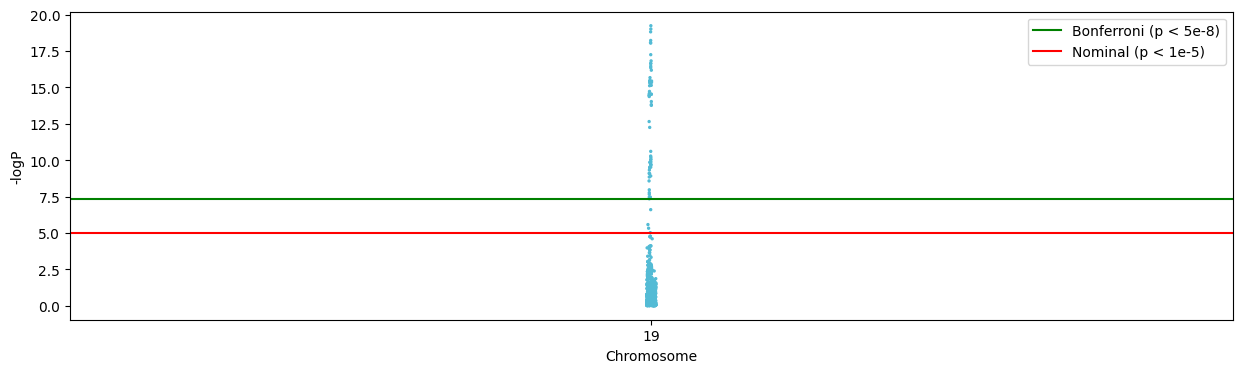

In [16]:
plot_manhattan(assoc_df, zoom_out = 7)